# Dataset Loading

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\SREE HARSHA\OneDrive\Documents\OneDrive\Desktop\Internship\Main Flow\House_price.csv")

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

   Size Location  Number of Rooms   Price
0  3974    Urban                2  438215
1  1660    Urban                7  371184
2  2094    Urban                6  324327
3  1930    Rural                2  472515
4  1895    Urban                4  193946
Size               0
Location           0
Number of Rooms    0
Price              0
dtype: int64
              Size  Number of Rooms          Price
count   100.000000       100.000000     100.000000
mean   2472.660000         4.160000  284910.710000
std     918.624094         1.698008  124404.738442
min     821.000000         2.000000   52869.000000
25%    1735.750000         3.000000  180627.500000
50%    2382.000000         4.000000  271059.000000
75%    3233.500000         5.000000  392156.750000
max    3974.000000         7.000000  497456.000000


First, load the dataset using Pandas and inspect its structure.

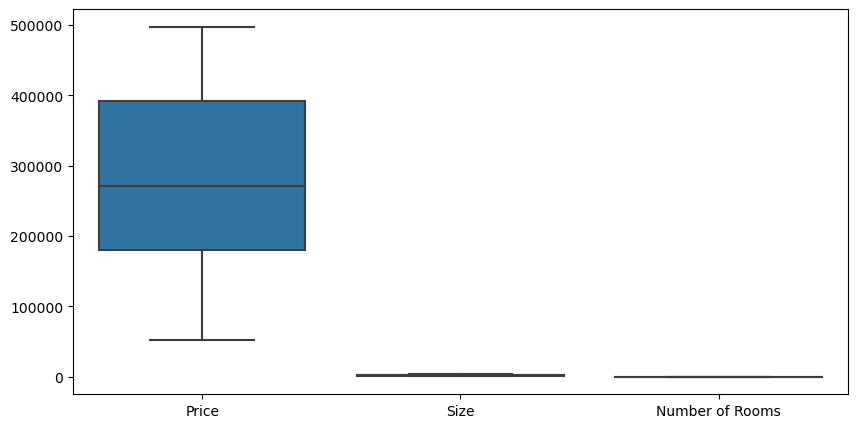

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Price', 'Size', 'Number of Rooms']])
plt.show()

Visualize distributions using boxplots

#  Data Preprocessing

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Size', 'Number of Rooms']] = scaler.fit_transform(df[['Size', 'Number of Rooms']])

Normalize Numerical Data Since Size and Rooms might have different scales, we use MinMaxScaler.

In [20]:
df = pd.get_dummies(df, columns=['Location'], drop_first=True)  # One-Hot Encoding

Encode Categorical Features Convert Location into numerical values using One-Hot Encoding.

# Feature Selection 

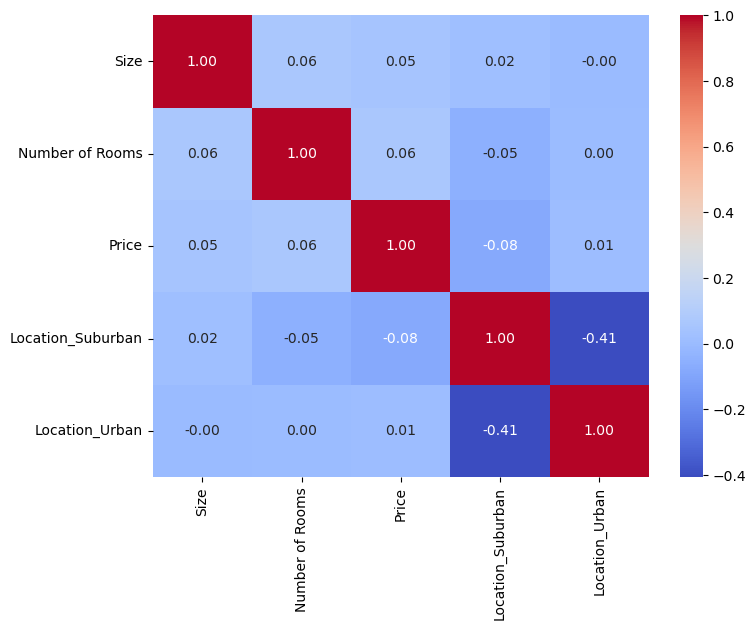

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

Check correlation to see which features are most important

# Model Training

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Split Data for Training and Testing

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Train a Linear Regression Model

# Model Evaluation

In [24]:
y_pred = model.predict(X_test)

Predictions on Test Data

Calculate Evaluation Metrics

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

RMSE: 143737.97363142384
R² Score: -0.20436661207748807


RMSE tells how much error the model makes on average.
R² Score shows how well the model explains house prices.

# Key Insights

 Key Insights:

Size & Rooms have a strong positive correlation with house prices.

Location significantly impacts pricing (urban vs. rural).

RMSE & R² Scores indicate how reliable the model is for real-world predictions.